# 1. AutoML

AutoML or Automated Machine Learning is a concept which describes the process of automating standard machine learning phases. By automating the learning phases we are trying to find the optimum neural network hyperparameters and parameters that result in model's higher accuracy and better generalization. Hence, the automated ML solutions are testing different sets of parameters and models in order to find the one that performs the best for a given task. The autoML is said to perform Neural Network Architecture Search (NAS). Automation can cover input data processing and preparation, data types identification, feature engineering, selection and extraction, hyperparameter optimization, model selection, autoML analysis and visualisation. The autoML is available as open source platform or as cloud enabled paid service.

## Cloud based AutoML
A cloud based autoML enable us to perform a complete end-to-end machine learning process in the cloud. With clearly defined problem statement we are able to do data collection and aggregation, data labeling and annotating, data splitting followed by data training, validation and evaluation. 

<img src="./images/automl.jpg"/>

<br>

The end result is an optimized machine learnig model capable of detecting objects (in our case this will be a flat tv/computer screen in the image). The cloud based AutoML made available this model in three different formats. The first, tfLite was accesible for export and download to be used within the edgeAI or mobile environment, the second tf.js was available for implementation and integration into web based applications, and the third option offered was a pb (protobuf) file for implementaion in containerized environments.


<img src="./images/automlexample.jpg"/>

<br><br><br>

## AutoML in local environment
AutomML based machine learning is also available for installation within a local environment. We will be dealing with the one based on Keras and developed by [DATA](http://faculty.cs.tamu.edu/xiahu/index.html) Lab at Texas A&M University. AutoKeras was developed with the goal to democritize AI and make machine learning more accessible for everyone. AutoKeras is an open-source alternative to cloud based AutoML solutions.

<img src="./images/autokeras.svg" width="320"/>
<br><br><br>
AutoKeras supports Image Classifiation, Image Regression, Text Classification, Text Regression, Structured Data Classification, Structured Data Regression. Moreover, the Time Series Forecasting, Object Detection and Image Segmentation machine learnig models are expected to become a part of autokeras autoML libraries.
<br><br>

More details about AutoKeras can be found in a [research paper](https://dl.acm.org/doi/pdf/10.1145/3292500.3330648) by Haifeng Jin, Qingquan Song, and Xia Hu. "Auto-keras: An efficient neural architecture search system." Proceedings of the 25th ACM SIGKDD International Conference on Knowledge Discovery & Data Mining. ACM, 2019. Authors give an overview of the field and explain the architecture and building blocks of automated machine learning. Figure below depicts the AutoKeras system overview.
<br><br>

<img src="./images/autokerasoverview.jpg" />
<br><br><br><br>

## Autokeras Installation 

Installation of AutoKeras can be performed using pip package manager. However, before installing it the following requirements need to be fulfilled: Python3, [Tensorflow >= 2.3.0](https://www.tensorflow.org/install/pip), [GPU installation](https://www.tensorflow.org/install/gpu) is optional but recommended.

```python
pip install tensorflow
pip install git+https://github.com/keras-team/keras-tuner.git
pip install autokeras
```

In [1]:
# check python version
!python --version

Python 3.8.5


In [2]:
# check tensorflow version
import tensorflow as tf
print(tf.__version__)

2.4.1


# Image classification using AutoKeras

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import autokeras as ak

## Data download

The MNIST database contains standard handwritten digits that have been widely used for training and testing of machine learning algorithms. It has a training set of 60,000 images and a test set of 10,000 images with each image being 28 x 28 pixels. This set is easy to use visualize and train on any computer. The MNIST dataset is usually provided and downloadable as part of the Keras library.


## MNIST data

In [4]:
#download MNIST data and split into train and test sets
# mnist.load_data()
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Fashion_MNIST data

In [ ]:
# fashion_mnist.load_data()
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

## cifar10 data

In [ ]:
# cifar10.load_data()
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
y_train =  [y for x in y_train for y in x]
y_test = [y for x in y_test for y in x]

# Dataset reduction


In [5]:
X_train = X_train[:10000]
y_train = y_train[:10000]
X_test = X_test[:100]
y_test = y_test[:100]

In [6]:
print(y_test[:5])

[7 2 1 0 4]


## Explore the train and test data

In [7]:
#check the shape, size and dtype of loaded dataset
print(f'The shape of training set is: {X_train.shape}')
print(f'The shape of test set is: {X_test.shape}\n')

print(f'The shape of label training set is: {y_train.shape}')
print(f'The shape of label test set is: {y_test.shape}\n')

print(f'The size of training set is: {X_train.size/1024} kB')
print(f'The size of test set is: {X_test.size/1024} kB\n')

print(f'The size of label training set is: {y_train.size/1024} kB')
print(f'The size of label test set is: {y_test.size/1024} kB\n')

print(f'The training set is: {X_train.ndim} - dimensional array')
print(f'The test set is: {X_test.ndim} - dimensional array\n')

print(f'The label training set is: {y_train.ndim} - dimensional array')
print(f'The label test set is: {y_test.ndim} - dimensional array\n')

print(f'The label training set type is: {X_train.dtype}')
print(f'The label test set type is: {X_test.dtype}\n')

print(f'The training set type is: {y_train.dtype}')
print(f'The test set type is: {y_test.dtype}\n')

The shape of training set is: (10000, 28, 28)
The shape of test set is: (100, 28, 28)

The shape of label training set is: (10000,)
The shape of label test set is: (100,)

The size of training set is: 7656.25 kB
The size of test set is: 76.5625 kB

The size of label training set is: 9.765625 kB
The size of label test set is: 0.09765625 kB

The training set is: 3 - dimensional array
The test set is: 3 - dimensional array

The label training set is: 1 - dimensional array
The label test set is: 1 - dimensional array

The label training set type is: uint8
The label test set type is: uint8

The training set type is: uint8
The test set type is: uint8



[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  79 237  37
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  41 243 239  39
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  18 207 254 140   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 143 254 254   5   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 112 251 249 228   4   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  41 228 254 202   

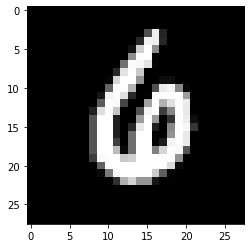

In [8]:
#chek the dataset image
import matplotlib.pyplot as plt
import random
randomSample=random.choice(X_train)
print(randomSample)
plt.imshow(randomSample, cmap="gray")
plt.plot()
print(X_train.shape[0])


0 AxesSubplot(0.125,0.125;0.110714x0.755)
1 AxesSubplot(0.257857,0.125;0.110714x0.755)
2 AxesSubplot(0.390714,0.125;0.110714x0.755)
3 AxesSubplot(0.523571,0.125;0.110714x0.755)
4 AxesSubplot(0.656429,0.125;0.110714x0.755)
5 AxesSubplot(0.789286,0.125;0.110714x0.755)


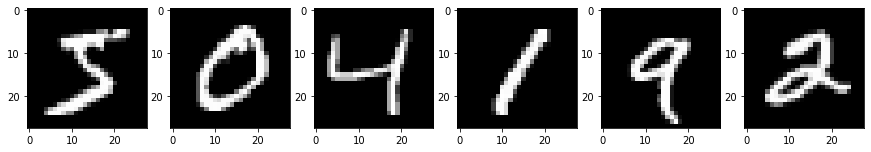

In [9]:
fig,axes=plt.subplots(nrows=1,ncols=6, figsize=(15,10))
for i,ax in enumerate(axes):
    print(i, ax)
    ax.imshow(X_train[i], cmap="gray")
    ax.axis()    
plt.show()

## Image classifier initialization

In [10]:
# Initialize the image classifier. Try only 1 model architecture and increase accordingly.
clf = ak.ImageClassifier(max_trials=1, overwrite = True)  
print(type(clf))

<class 'autokeras.tasks.image.ImageClassifier'>


## Training the model
### Data formats/types
In terms of data formats and classification label types Autokeras accepts image data with/without channel dimension and for classification labels both plain labels or one hot encoded labels are accepted. With standard keras modeling/training we transformed both images and labels. Recall that the *y_train and y_test data* were not split into 10 distinct class labels, but represented as a single array with the class values. Thus, we needed to preprocess class labels by converting the 1 - dimensional numpy array to 10 - dimensional array. The same applies to normalization/standardization of input data. Hence, in the case of autoML we will skip data preprocessing as it was the case with standard ML model. 

tf.data.Dataset format is also supported as input data format:
```python
train_set = tf.data.Dataset.from_tensor_slices(((x_train,), (y_train,)))
test_set = tf.data.Dataset.from_tensor_slices(((x_test,), (y_test,)))
```

In [11]:
# Feed the image classifier with training data.
training = clf.fit(X_train, y_train, epochs=1, validation_split=0.20)  # Change no of epochs to improve the model

Trial 1 Complete [00h 00m 11s]
val_loss: 0.19520288705825806

Best val_loss So Far: 0.19520288705825806
Total elapsed time: 00h 00m 11s
INFO:tensorflow:Oracle triggered exit
313/313 [==============================] - 11s 34ms/step - loss: 0.7082 - accuracy: 0.7725
INFO:tensorflow:Assets written to: .\image_classifier\best_model\assets


## Evaluate the model

In [12]:
score = clf.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 5ms/step - loss: 0.1491 - accuracy: 0.9500
Test loss: 0.14911793172359467
Test accuracy: 0.949999988079071


# Exercise

####  Change the size of input data and see what happens?

####  Change the max_trials parameters and see what happens?

####  Change the value of epochs parameters and see what happens with the model performance?

## AutoModel building blocks

```python
input_node = ak.ImageInput()
output_node = ak.ImageBlock(
    # Only search ResNet architectures.
    block_type="resnet",
    # Normalize the dataset.
    normalize=True,
    # Do not do data augmentation.
    augment=False,
)(input_node)
output_node = ak.ClassificationHead()(output_node)
clf = ak.AutoModel(
    inputs=input_node, outputs=output_node, overwrite=True, max_trials=1
)
clf.fit(x_train, y_train, epochs=10)
```

```python
input_node = ak.ImageInput()
output_node = ak.Normalization()(input_node)
output_node = ak.ImageAugmentation(horizontal_flip=False)(output_node)
output_node = ak.ResNetBlock(version="v2")(output_node)
output_node = ak.ClassificationHead()(output_node)
clf = ak.AutoModel(
    inputs=input_node, outputs=output_node, overwrite=True, max_trials=1
)
clf.fit(x_train, y_train, epochs=10)
```

## Export and save the best model

In [13]:
# Export as a Keras Model.
model = clf.export_model()
model.save("model_autokeras.h5")

## Model summary

In [14]:
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
cast_to_float32 (CastToFloat (None, 28, 28)            0         
_________________________________________________________________
expand_last_dim (ExpandLastD (None, 28, 28, 1)         0         
_________________________________________________________________
normalization (Normalization (None, 28, 28, 1)         3         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0     

## Make predictions

In [45]:
predicted_y = clf.predict(X_test)
print(predicted_y[:10])

[['7']
 ['2']
 ['1']
 ['0']
 ['4']
 ['1']
 ['4']
 ['9']
 ['6']
 ['9']]



 [['4']]


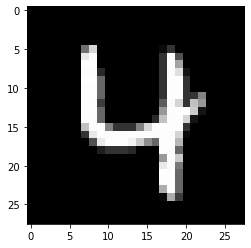

In [48]:
# take an image from a test set and check the model's prediciton
randomSample=random.choice(X_test)
plt.imshow(randomSample, cmap="gray")
plt.plot()
randomSample=randomSample.reshape(1,28,28)
predicted_y = clf.predict(randomSample)
print('\n',predicted_y)

# 2. Cloud based cognitive services
* Microsoft's Video Indexer (https://www.videoindexer.ai/)
* Google's Video AI (https://cloud.google.com/video-intelligence)
* Amazon's SageMaker (https://aws.amazon.com/sagemaker/?nc2=h_ql_prod_ml_sm).

This is an example how image dataset was created within a cloud environment to detect objects in images. In this example GCP - [Google Cloud Platform Vision module](https://console.cloud.google.com/vision/datasets?project=tvdetection01) was used to upload, store, create, label, train, validate and export ML model to mobile, web or containerized platforms.

# 3. Additional information 

For those who want to find out more the achievements in the field of Computer Vision and Image Processing please check the sources listed below:
 

Check the following conferences/journals:

* CVPR: IEEE Conference on Computer Vision and Pattern Recognition
* JVIR: Journal of Visual Communication and Image Representation
* ICCV: International Conference on Computer Vision
* ECCV: European Conference on Computer Vision
* NIPS: Neural Information Processing Systems
* ICML: International Conference on Machine Learning

 

web sites:

* https://www.nvidia.com/en-us/research/computer-vision/

* https://arxiv.org/

* https://cs.stanford.edu/people/karpathy/deepvideo/

* https://cloud.google.com/vision/

* https://www.microsoft.com/en-us/research/research-area/computer-vision/

* http://vision.stanford.edu/

* https://www.research.ibm.com/artificial-intelligence/computer-vision/

 

and books:

* CV: Algorithms and Applications, Richard Szeliski

* CV: Models, Learning, and Inference, Simon Prince

* CV: A Modern Approach, D. A. Forsyth, J. P. Ponce

* Machine Vision, R. Jain, R. Kasturi, B. 

* Practical Computer Vision With SimpleCV, Kurt DeMaagd, Anthony Oliver, Nathan Oostendorp, and Katherine Scott

* Digital Image Processing, R. C. Gonzalez, R. E. Woods.

 


Follow the latest work/posts/blogs written by top researchers in the field such as Alex Krizhevsky, Andrew Ng,  Andrej Karpathy, Geoffrey E. Hinton, Ilya Sutskever, etc.

 
Check out data competitions such as Kaggle competition related to CV and DIP - https://www.kaggle.com/competitions or DrivenData competitions related to CV and DIP - https://www.drivendata.org/competitions/.